<h3>About Machine Learning</h3>
<p>
    Machine Learning adalah teknik dimana komputer dapat mengekstraksi atau mempelajari pola dari suatu data, kemudian dengan pola yang telah dipelajari dari data historis, komputer mampu mengenali dan memprediksi trend, hasil atau kejadian di masa mendatang atau dari observasi baru tanpa perlu diprogram secara eksplisit,” jelas Senja sembari menyeruput kopi hangatnya.
</p>
<p>
    Dalam pembuatan model machine learning tentunya dibutuhkan data. Sekumpulan data yang digunakan dalam machine learning disebut DATASET, yang kemudian dibagi/di-split menjadi training dataset dan test dataset.
    TRAINING DATASET digunakan untuk membuat/melatih model machine learning, sedangkan TEST DATASET digunakan untuk menguji performa/akurasi dari model yang telah dilatih/di-training.
</p>
<p>
    Umumnya dataset disajikan dalam bentuk tabel yang terdiri dari baris dan kolom. Bagian Kolom adalah FEATURE atau VARIABEL data yang dianalisa, sedangkan bagian baris adalah DATA POINT/OBSERVATION/EXAMPLE.
    Hal yang menjadi target prediksi atau hal yang akan diprediksi dalam machine learning disebut LABEL/CLASS/TARGET. Dalam statistika/matematika, LABEL/CLASS/TARGET ini dinamakan dengan Dependent Variabel, dan FEATURE adalah Independent Variabel.
</p>
<p>
     Machine Learning itu terbagi menjadi 2 tipe yaitu supervised dan unsupervised Learning. Jika LABEL/CLASS dari dataset sudah diketahui maka dikategorikan sebagai supervised learning, dan jika Label belum diketahui maka dikategorikan sebagai unsupervised learning
</p>
<img src="spv-unspv.png", alt= "spv vs unsvp">

In [23]:
# Eksplorasi Data: Memahami Data dengan Statistik - Part 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         

In [24]:
# Eksplorasi Data: Memahami Data dengan Statistik - Part 2
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())

Korelasi dataset:
                          Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601466   
Administrative_Duration        0.601466                 1.000000   
Informational                  0.376782                 0.302647   
Informational_Duration         0.255757                 0.237959   
ProductRelated                 0.430832                 0.288869   
ProductRelated_Duration        0.373647                 0.355238   
BounceRates                   -0.223474                -0.144128   
ExitRates                     -0.316192                -0.205618   
PageValues                     0.098771                 0.067463   
SpecialDay                    -0.095054                -0.073472   
OperatingSystems              -0.006459                -0.007425   
Browser                       -0.025243                -0.015525   
Region                        -0.005680                -0.005681   
TrafficType                  

<ipython-input-24-c3fbdc333b70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_corr = dataset.corr()
<ipython-input-24-c3fbdc333b70>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Korelasi dataset:\n', dataset.corr())


In [25]:
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates:', dataset_corr.loc['ExitRates','BounceRates'])
print('\nKorelasi Revenue-PageValues:', dataset_corr.loc['Revenue','PageValues'])
print('\nKorelasi TrafficType-Weekend:', dataset_corr.loc['TrafficType','Weekend'])


Korelasi BounceRates-ExitRates: 0.9134364214595573

Korelasi Revenue-PageValues: 0.49256929525120574

Korelasi TrafficType-Weekend: -0.0022212292430310644


<h4><b>Kenapa mengetahui distribusi LABEL dari dataset itu penting?</b></h4>
<p>Mengetahui distribusi label sangat penting untuk permasalahan klasifikasi, karena jika distribusi label sangat tidak seimbang (imbalanced class),  maka akan sulit bagi model untuk mempelajari pola dari LABEL yang sedikit dan hasilnya bisa misleading. Contohnya, kita memiliki 100 row data, 90 row adalah non fraud dan 10 row adalah fraud. Jika kita menggunakan data ini tanpa melakukan treatment khusus (handling imbalanced class), maka kemungkinan besar model kita akan cenderung mengenali observasi baru sebagai non-fraud, dan hal ini tentunya tidak diinginkan<p>

c:\Users\zydd\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\zydd\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


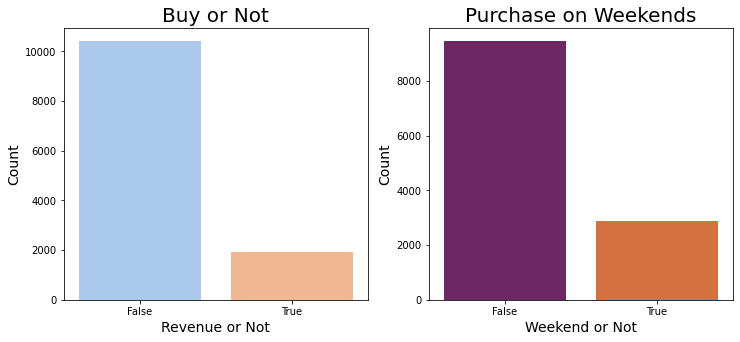

In [26]:
# Eksplorasi Data: Memahami Data dengan Visual

# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1,2,1)
sns.countplot(dataset['Revenue'], palette= 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or Not', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
# checking the Distribution of customers on Weekend
plt.subplot(1,2,2)
sns.countplot(dataset['Weekend'], palette= 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or Not', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

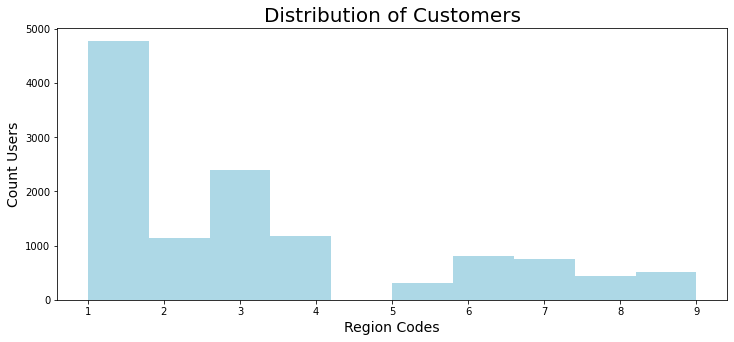

In [27]:
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

In [28]:
# Data Pre-processing: Handling Missing Value - Part 1
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


In [29]:
# Data Pre-processing: Handling Missing Value - Part 2
# Drop rows with missing value   
dataset_clean = dataset.dropna() 
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


In [30]:
# Data Pre-processing: Handling Missing Value - Part 3

# replace with mean values
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())


# replace with median values
# print("Before imputation:")
# # Checking missing value for each feature  
# print(dataset.isnull().sum())
# # Counting total missing value  
# print(dataset.isnull().sum().sum())

# print("\nAfter imputation:")
# # Fill missing value with median of feature value  
# dataset.fillna(dataset.median, inplace = True)
# # Checking missing value for each feature  
# print(dataset.isnull().sum())
# # Counting total missing value  
# print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

<ipython-input-30-431180d29bfa>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean(), inplace = True)


<h3>Data Preprocessing: Scaling</h3>
<p>
“Setelah berhasil menangani missing value, sekarang mari kita mempelajari tahapan preprocessing selanjutnya. Aksara, tolong tampilkan kembali 5 dataset teratas dan deskripsi statistik dari dataset. Coba perhatikan, rentang nilai dari setiap feature cukup bervariasi. Misalnya, ProductRelated_Duration vs BounceRates.  ProductRelated_Duration memiliki rentang nilai mulai dari 0 - 5000; sedangkan BounceRates rentang nilainya 0 - 1. Bisa kamu lihat?”

“<b>Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama</b>, karena jika tidak sama, feature dengan rentang nilai terbesar misalnya ProductRelated_Duration otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu <mark>perlu melakukan data rescaling</mark> ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai max = 1 dan nilai min = 0. Data rescaling ini dengan mudah dapat dilakukan di Python menggunakan .MinMaxScaler( ) dari Scikit-Learn library.”
</p>

<h3> Quick Explanation About Scikit-Learn </h3>
<p>
Scikit-learn adalah library untuk machine learning bagi para pengguna python yang memungkinkan kita melakukan berbagai pekerjaan dalam Data Science, seperti regresi (regression), klasifikasi (classification), pengelompokkan/penggugusan (clustering), data preprocessing, dimensionality reduction, dan model selection (pembandingan, validasi, dan pemilihan parameter maupun model)
</p>

In [31]:
# import sklearn
from sklearn.preprocessing import MinMaxScaler  

#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
# only numeric datatype can work
scaling_column = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


<p>
Ada dua kolom yang bertipe object yang dinyatakan dalam tipe data str, yaitu kolom 'Month' dan 'VisitorType'. Karena setiap algoritma machine learning bekerja dengan menggunakan nilai numeris, maka kita perlu mengubah kolom dengan tipe pandas object atau str ini ke bertipe numeris. Untuk itu, kita list terlebih dahulu apa saja label unik di kedua kolom ini
</p>

In [32]:
# Data Pre-processing: Konversi string ke numerik
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
le = LabelEncoder()
dataset['Month'] = le.fit_transform(dataset['Month'])
print(le.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
le = LabelEncoder()
dataset['VisitorType'] = le.fit_transform(dataset['VisitorType'])
print(le.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


<h3>Features & Label</h3>
<p>Dalam dataset user online purchase, label target sudah diketahui, yaitu kolom Revenue yang bernilai 1 untuk user yang membeli dan 0 untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi. Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan [Revenue] adalah variabel Target yang dideklarasikan sebagai y. Gunakan fungsi drop() untuk menghapus kolom [Revenue] dari dataset.</p>

In [33]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)

Shape of X: (12330, 17)
Shape of Y: (12330,)


<h3>Training dan Test Dataset</h3>
<p>
“Sebelum melatih model dengan suatu algorithm machine , dataset perlu kita bagi ke dalam training dataset dan test dataset dengan perbandingan 80:20. 80% digunakan untuk training dan 20% untuk proses testing.”
</p>
<p>
“Perbandingan lain yang biasanya digunakan adalah 75:25. Hal penting yang perlu diketahui adalah scikit-learn tidak dapat memproses dataframe dan hanya mengakomodasi format data tipe Array. Tetapi kalian tidak perlu khawatir, fungsi train_test_split( ) dari Scikit-Learn, otomatis mengubah dataset dari dataframe ke dalam format array."
</p>
<p>
“Fungsi Training adalah melatih model untuk mengenali pola dalam data, sedangkan testing berfungsi untuk memastikan bahwa model yang telah dilatih tersebut mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya
</p>

In [34]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


<h2 style="text-align:center;">Classification - Decision Tree</h2>
<p>
Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem. Secara sederhana, struktur dari decision tree adalah sebagai berikut:
<p style="text-align:center;"><img src="decision_tree.png" alt="confusion matrix"></p>
</p>
<p>
Decision tree terdiri dari :
<ul>
    <li>Decision Node yang merupakan feature/input variabel</li>
    <li>Branch yang ditunjukkan oleh garis hitam berpanah, yang adalah rule/aturan keputusan</li>
    <li>Leaf yang merupakan output/hasil.</li>
</ul>
Decision Node paling atas dalam decision tree dikenal sebagai akar keputusan, atau feature utama yang menjadi asal mula percabangan. Jadi, decision tree membagi data ke dalam kelompok atau kelas berdasarkan feature/variable input, yang dimulai dari node paling atas (akar), dan terus bercabang ke bawah sampai dicapai cabang akhir atau leaf.
</p>
<p>
Misalnya ingin memprediksi apakah seseorang yang mengajukan aplikasi kredit/pinjaman, layak untuk mendapat pinjaman tersebut atau tidak. Dengan menggunakan decision tree, dapat membreak-down kriteria-kriteria pengajuan pinjaman ke dalam hierarki seperti gambar berikut :
<p style="text-align:center;"><img src="decision_tree2.png" alt="confusion matrix"></p>
Seumpama, orang yang mengajukan berumur lebih dari 40 tahun, dan memiliki rumah, maka aplikasi kreditnya dapat diluluskan, sedangkan jika tidak, maka perlu dicek penghasilan orang tersebut. Jika kurang dari 5000, maka permohonan kreditnya akan ditolak. Dan jika usia kurang dari 40 tahun, maka selanjutnya dicek jenjang pendidikannya, apakah universitas atau secondary. Nah, percabangan ini masih bisa berlanjut hingga dicapai percabangan akhir/leaf node.

Seperti yang sudah dilakukan dalam prosedur pemodelan machine learning, selanjutnya dapat dengan mudah melakukan pemodelan decision tree dengan menggunakan scikit-learn module, yaitu <mark>DecisionTreeClassifier</mark>.
</p>

In [35]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
clf = DecisionTreeClassifier()
# Fit the classifier to the training data
clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy Score is: ',accuracy_score(y_test, predictions))

Accuracy Score is:  0.8609083536090836


<h3>Evaluasi Model Performance</h3>
<p>Untuk evaluasi model performance, setiap algorithm mempunyai metrik yang berbeda-beda. Sekarang saya akan menjelaskan sedikit metrik apa saja yang umumnya digunakan. Metrik paling sederhana untuk mengecek performansi model adalah accuracy. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML
</p>
<p style="text-align:center;"><img src="conf_matrix.png" alt="confusion matrix"></p>
<ol>
    <li>True Positive (TP): Jika user diprediksi membeli (Positif), dan user aktualnya benar membeli (Positif).</li>
    <li>True Negative (TN): Jika user diprediksi tidak membeli (Negatif) dan user aktualnya tidak membeli (Negatif).</li>
    <li>False Positive (FP): Jika user diprediksi membeli (Positif), tetapi user ternyata aktualnya tidak membeli (Negatif).</li>
    <li>False Negatif (FN): Jika user diprediksi tidak membeli (Negatif), tetapi user ternyata aktualnya membeli (Positif).</li>
</ol>

<p>Berdasarkan confusion matrix, dapat mengukur metrik - metrik berikut :</p>
<ol>
    <li>Accuracy = (TP + TN ) / (TP+FP+FN+TN) </li>
    <li>Precision = (TP) / (TP+FP) </li>
    <li>Recall = (TP) / (TP + FN) </li>
    <li>F1 Score = 2 * (Recall*Precission) / (Recall + Precission) </li>
</ol>

In [36]:
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8637469586374696

Confusion matrix:
[[1893  151]
 [ 185  237]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.93      0.92      2044
        True       0.61      0.56      0.59       422

    accuracy                           0.86      2466
   macro avg       0.76      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



<h3>Pakai Metrik yang Mana?</h3>
<p>Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan Accuracy, tetapi jika tidak seimbang, maka sebaiknya menggunakan F1-Score.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision.</p>

<h2 style="text-align:center;">Classification - Logistic Regression</h2>
<p>
Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa categorical/discrete value.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Umumnya Logistic Regression dipakai untuk binary classification (1/0; Yes/No; True/False) problem, tetapi beberapa data scientist juga menggunakannya untuk multiclass classification problem.

<mark>jika output dari fungsi sigmoid bernilai lebih dari 0.5, maka data point diklasifikasi ke dalam label/class: 1 atau YES; dan kurang dari 0.5, akan diklasifikasikan ke dalam label/class: 0 atau NO.</mark><p>

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.8807785888077859
Testing Accuracy : 0.8580697485806975

Confusion matrix
[[2009   35]
 [ 315  107]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.75      0.25      0.38       422

    accuracy                           0.86      2466
   macro avg       0.81      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



c:\Users\zydd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h2 style="text-align:center;">Classification - Linear Regression</h2>
<p>
Regression merupakan metode statistik dan machine learning yang paling banyak digunakan. Seperti yang dijelaskan sebelumnya, regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (independent variables atau features) dan variabel output (dependent variables atau label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.
<p style="text-align:center;"><img src="linier_regression.png"></p>

Model regresi terdiri atas 2 tipe yaitu :
<ol>
    <li>Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.</li>
    <li>Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).</li>
</ol>
Adapun model regresi yang paling umum digunakan adalah Linear Regression.<p>
<p>Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (label atau target) dan independent variabel (features). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun). Rumus matematis dari Linear Regression adalah:
<p style="text-align:center"><mark>y = a+bX</mark></p>
untuk simple linear regression, atau:
<p style="text-align:center"><mark>y = a+ b1X1+b2X2...biXi</mark></p>
untuk multiple linear regression dengan, y adalah target/label, X adalah feature, dan a,b adalah model parameter (intercept dan slope).
<p style="text-align:center;"><img src="linier_regression2.png"></p>

Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa asumsi yang harus dipenuhi, yaitu :
<ol>
    <li>Terdapat hubungan linear antara variabel input (feature) dan variabel output(label). Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.</li>
    <li>Tidak ada multicollinearity antara features. Multicollinearity artinya terdapat dependency (ketergantungan) antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui.</li>
    <li>Tidak ada autocorrelation dalam data, contohnya pada time-series data.</li>
</ol>
</p>

In [56]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


<p>“Untuk model regression, kita menghitung selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred) yang disebut error, adapun beberapa metric yang umum digunakan. Coba kamu ke mari, aku jelaskan langkah-langkahnya.”

<ul>
    <li>Mean Squared Error (MSE)</li>
    <li>Root Mean Squared Error (RMSE)</li>
    <li>Mean Absolute Error (MAE)</li>
</ul>

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi. Untuk menghitung nilai MSE, RMSE dan MAE dapat dilakukan dengan menggunakan fungsi mean_squared_error () ,  mean_absolute_error () dari scikit-learn.metrics dan untuk RMSE sendiri tidak terdapat fungsi khusus di scikit-learn tapi dapat dengan mudah kita hitung dengan terlebih dahulu menghitung MSE kemudian menggunakan numpy module yaitu, sqrt() untuk memperoleh nilai akar kuadrat dari MSE.
</p>

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


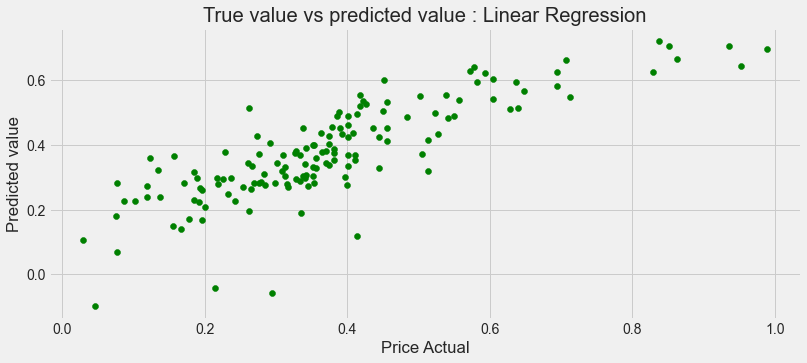

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import numpy as np
import matplotlib.pyplot as plt 
import math

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

<h3>Unsupervised Learning</h3>
<p>Unsupervised Learning adalah teknik machine learning dimana tidak terdapat label atau output yang digunakan untuk melatih model. Jadi, model dengan sendirinya akan bekerja untuk menemukan pola atau informasi dari dataset yang ada. Metode unsupervised learning yang dikenal dengan clustering. Sesuai dengan namanya, Clustering memproses data dan mengelompokkannya atau mengcluster objek/sample berdasarkan kesamaan antar objek/sampel dalam satu kluster, dan objek/sample ini cukup berbeda dengan objek/sample di kluster yang lain. Contohnya pada gambar berikut:
<p style="text-align:center"><img src="clustering.png"></p>
</p>

<h2 style="text-align:center">K-Means Clustering</h2>
<p>
 “K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat.”

 Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data. Iterasi selanjutnya, titik-titik centroid diupdate atau berpindah ke titik yang lain, dan jarak dari data point yang lain ke centroid yang baru dihitung kembali, kemudian dikelompokkan kembali berdasarkan jarak terdekat ke centroid yang baru. Iterasi akan terus berlanjut hingga diperoleh cluster dengan error terkecil, dan posisi centroid tidak lagi berubah.
 <p style="text-align:center"><img src= "clustering2.png"></p>

 Clustering yang baik adalah cluster yang data point-nya saling rapat/sangat berdekatan satu sama lain dan cukup berjauhan dengan objek/data point di cluster yang lain. Jadi, objek dalam satu cluster tidak tersebut berjauhan. Nah, untuk mengukur kualitas dari clustering, kita bisa menggunakan inertia.
 
 Inertia sendiri mengukur seberapa besar penyebaran object/data point data dalam satu cluster, semakin kecil nilai inertia maka semakin baik. Kita tidak perlu bersusah payah menghitung nilai inertia karena secara otomatis, telah dihitung oleh KMeans( ) ketika algorithm di fit ke dataset. Untuk mengecek nilai inertia cukup dengan print fungsi .inertia_ dari model yang sudah di fit ke dataset.

 <p style="text-align:center"><img src= "clustering3.png"></p>

 Meskipun suatu clustering dikatakan baik jika memiliki inertia yang kecil tetapi secara praktikal in real life, terlalu banyak cluster juga tidak diinginkan. Adapun rule untuk memilih jumlah cluster yang optimal adalah dengan memilih jumlah cluster yang terletak pada “elbow” dalam intertia plot, yaitu ketika nilai inertia mulai menurun secara perlahan. Jika dilihat pada gambar maka jumlah cluster yang optimal adalah K = 3.
 </p>

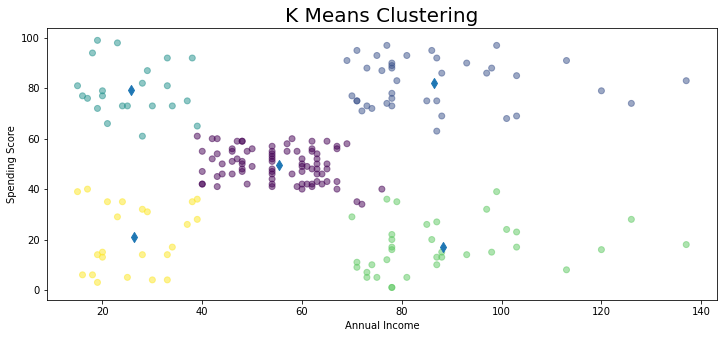

In [40]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
# n_cluster = jumlah klaster
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

# Inspect & Visualizing the Cluster
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='d', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [41]:
# idk know how can't work well, but in dqlab it is working properly


# membuat inertia plot untuk melihat apakah K = 5 merupakan jumlah cluster yang optimal. Saya kirim ya berkas latihannya (lanjutan diatas)

# #import library
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# #Elbow Method - Inertia plot
# inertia = []
# #looping the inertia calculation for each k
# for k in range(1, 10):
#     #Assign KMeans as cluster_model
#     cluster_model = KMeans(n_clusters = k, random_state = 24)
#     #Fit cluster_model to X
#     cluster_model.fit(X)
#     #Get the inertia value
#     inertia_value = cluster_model.inertia_
#     #Append the inertia_value to inertia list
#     inertia.append(inertia_value)
    
# ##Inertia plot
# plt.plot(range(1, 10), inertia)
# plt.title('The Elbow Method - Inertia plot', fontsize = 20)
# plt.xlabel('No. of Clusters')
# plt.ylabel('inertia')
# plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [44]:
dataset[['annual_income','spending_score']].isna().sum()

annual_income     0
spending_score    0
dtype: int64

<h2 style="text-align:center"> Case Study: Promos for our e-commerce</h2>

In [45]:
# Case Study: Promos for our e-commerce - Part 1

#import library 
import pandas as pd

# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Cli

In [54]:
# Case Study: Promos for our e-commerce - Part 2

#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("\n[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
# print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
data.groupby(['Clicked on Ad']).size()


[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.

<ipython-input-54-17431822ed27>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


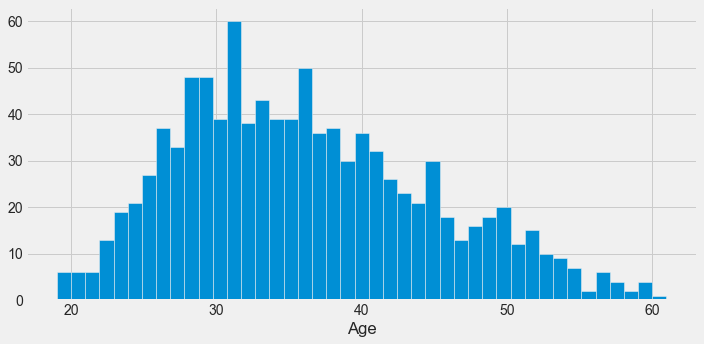

<Figure size 864x360 with 0 Axes>

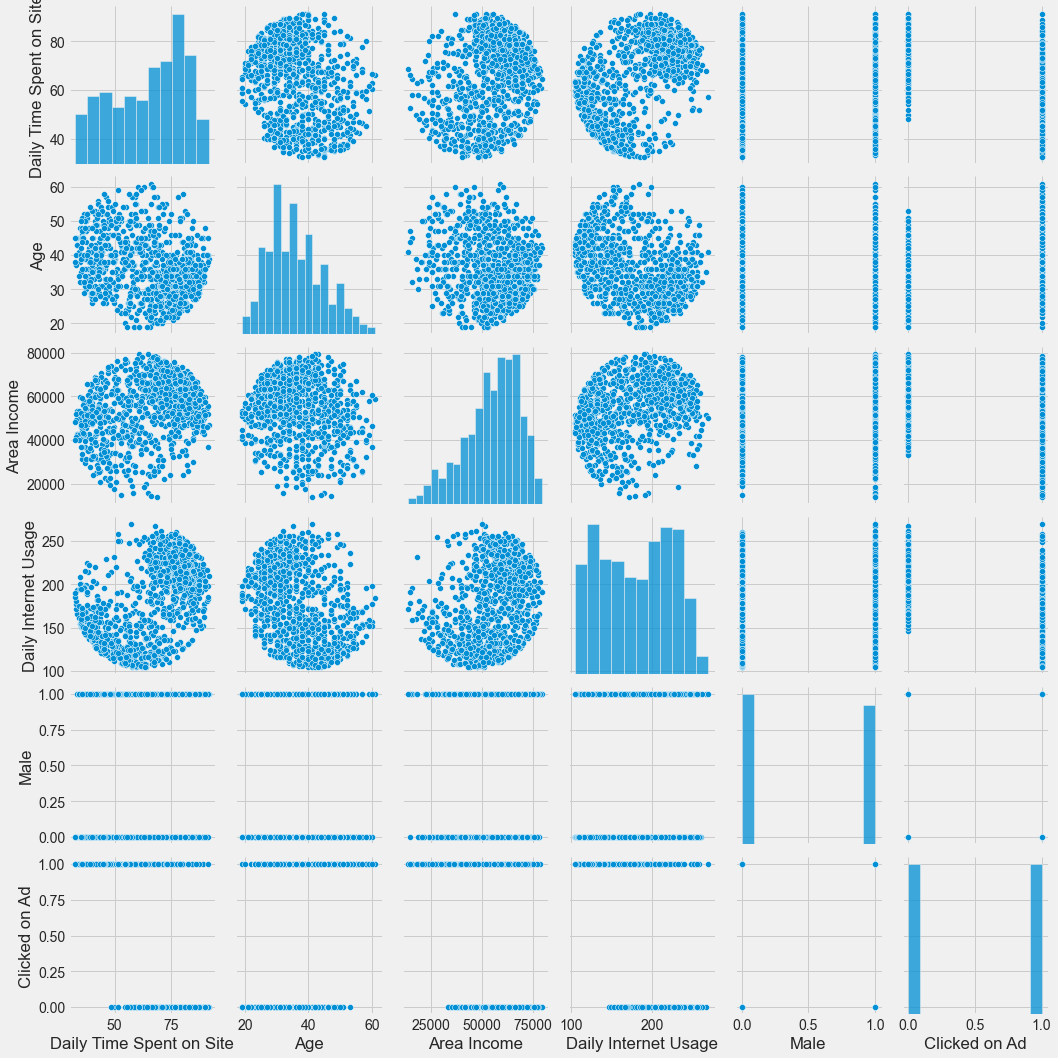

In [55]:
# Case Study: Promos for our e-commerce - Part 3

#import library
import matplotlib.pyplot as plt
import seaborn as sns

# Seting: matplotlib and seaborn
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

# check missing values
print(data.isnull().sum())

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data.Age, bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
plt.figure()
sns.pairplot(data)
plt.show()

In [58]:
# Case Study: Promos for our e-commerce - Part 4

#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#6.Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.   
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train,y_train))
print("Testing Accuracy :", logreg.score(X_test,y_test))


[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


In [59]:
# Case Study: Promos for our e-commerce - Part 5

# Import library
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)


[7] Print Confusion matrix dan classification report
Confusion matrix:
[[85  4]
 [16 95]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200

